#Ejercicios

Es sabido que, una entidad que presta servicios o productos (pudiera ser una empresa, un banco, una tienda, etcétera) puede mejorar la experiencia de cliente desarrollando productos personalizados en pos de las preferencias y necesidades de cada uno de sus clientes.
El set de datos potencial contiene datos sobre clientes de una institución financiera:

● Customer ID: ID asociado al cliente

● Age: Edad en años del cliente

● Income: Ingreso anual del cliente

● Family: Tamaño del grupo familiar del cliente

● CCAvg: Cupo promedio mensual utilizado en tarjetas de crédito

● Education: Nivel educacional (1 si no es graduado, 2 graduado y 3 si posee estudios especializadoss (magister, doctorado, etcétera)

● Mortgage: Monto de la hipoteca (0 indica que no posee)

● ZIP Code: Código postal del domicilio

En la última campaña a cada cliente se le ofreció un producto personalizado en base a su comportamiento financiero, preferencias, capacidad de pago y necesidades. La variable target corresponde a Personal Loan el cual indica si el cliente tomó o no tomó este producto (¿El cliente aceptó o no el producto ofrecido? ), donde 0 indica que el cliente no adquirió el producto y 1 indica que sí lo adquirió.
Es de interés analizar cuáles pudieran ser los perfiles de clientes que tienen mayor probabilidad de aceptar el producto ofrecido, de manera de, identificar a los clientes con dichas características y priorizarlos a ellos en las próximas campañas.

a) Cargue el set de datos utilizando la función read.excel de pandas. ¿Qué columnas le hacen sentido incluir en un modelo para predecir si un cliente tomará o no el producto ofrecido? Si desea eliminar alguna columna, recuerde que puede usar la función drop('nombre columna a eliminar', axis=1).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [ ]:
def decision_tree(X_train, y_train, max_depth=None):
  """
    funcionn para entredar modelo arbol de decision
    input: X_train, y_train
    output model, y_pred
  """
  # Create the decision tree classifier
  clf = DecisionTreeClassifier(max_depth=max_depth)
  clf.fit(X_train, y_train)
  # Make predictions on the test set
  return clf, clf.predict(X_test)

In [ ]:
potencial_df = pd.read_excel("potencial.xlsx")
potencial_df.head(2)

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,49,91107,4,1.6,1,0,0
1,2,45,34,90089,3,1.5,1,0,0


In [ ]:
# Creo que las variables "ID" y "ZIP Code" no aporta información útil para la predicción el modelo
# son eliminadas del dataframe
potencial_df.drop(columns=['ID','ZIP Code'], inplace=True)

b) Determine cuáles son las variables predictoras que son categorías y obtenga las variables dummies correspondientes para incluirlas en el modelo.
Recuerde que puede usar la función get_dummies() de pandas.

In [ ]:
# las variables resultantes a excepción de la variable Personal Loan, son todas predictoras
# la variable predictora "Education" es categórica por lo que será convertida a dummy
pd.get_dummies(potencial_df, columns=['Education'])

,Age,Income,Family,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3
0,25,49,4,1.6,0,0,1,0,0
1,45,34,3,1.5,0,0,1,0,0
2,39,11,1,1.0,0,0,1,0,0
3,35,100,1,2.7,0,0,0,1,0
4,35,45,4,1.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,0,0,0,0,1
4996,30,15,4,0.4,85,0,1,0,0
4997,63,24,2,0.3,0,0,0,0,1
4998,65,49,3,0.5,0,0,0,1,0


c) Defina en un objeto X las variables predictoras y en Y la variable respuesta Personal Loan. 

In [ ]:
X = potencial_df.drop(columns='Personal Loan')
y = potencial_df['Personal Loan']

Obtenga los set de entrenamiento y prueba en una proporción 5:1. Recuerde que la función train_test_split() es útil para realizar split simple, además fije una semilla 2021 (random_state=2021 en la función train_test_split()).

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=2021
    )

d) Obtenga un árbol de decisión con el set de datos de entrenamiento.


In [ ]:
# Create the decision tree classifier
# Make predictions on the test set
clf, y_pred = decision_tree(X_train, y_train)

Obtenga el MSE del modelo en el set de prueba. 

In [ ]:
# true and predicted values
y_true = y_test
y_pred = y_pred

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print('DecisionTreeClassifier (MSE):'+str(mse))

DecisionTreeClassifier (MSE):0.014


Muestre el árbol obtenido.

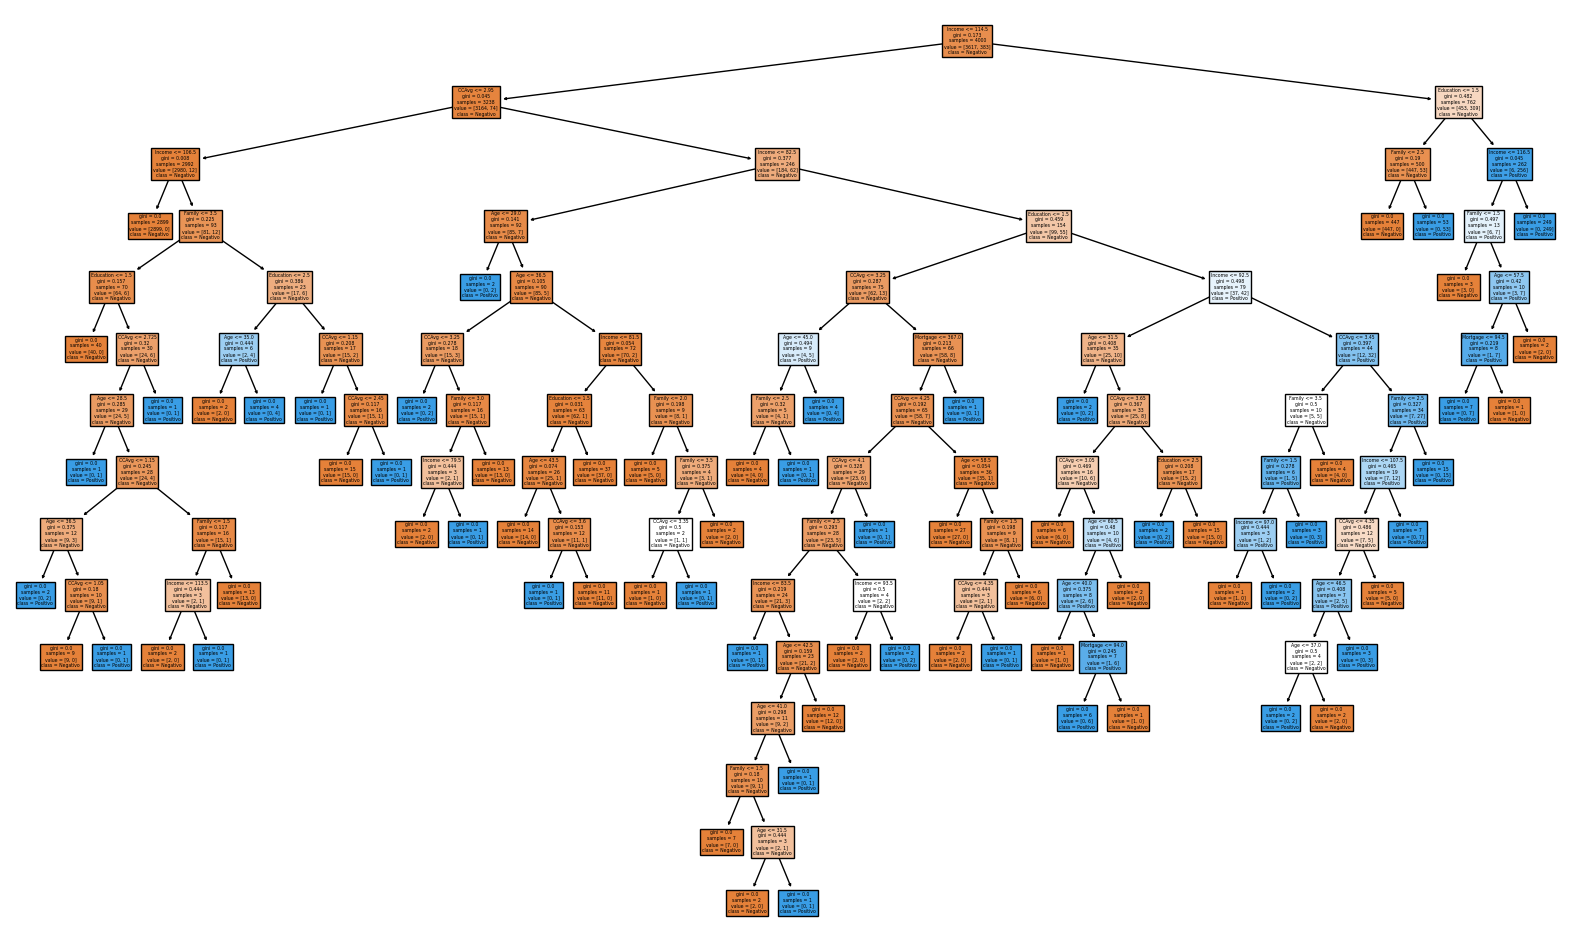

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the decision tree structure
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(
    clf,
    feature_names=list(X.columns.values),
    class_names=np.array(['Negativo','Positivo']),
    filled=True
)

Text(0, 0.5, 'Feature')

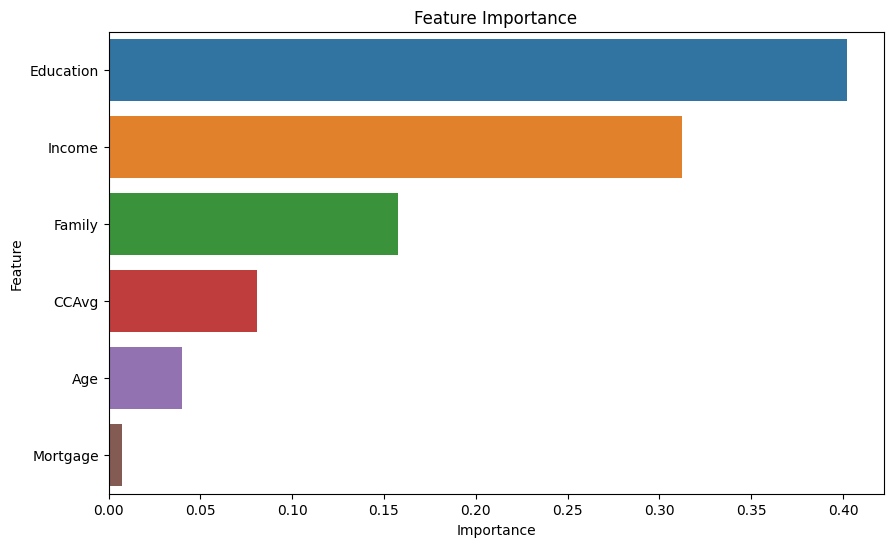

In [ ]:
# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame(
    {'Feature': list(X.columns.values), 'Importance': importances}
)

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importances, ax=ax)

# Set the title and labels
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

¿qué observa? 

In [ ]:
# Se visualizan muchos niveles y adicionalmente la importancia de las variables explicativas, la primera en importancia es la variable 
# "Education" y en segundo lugar en orden de importancia, la variable Income que habla sobre los ingresos anuales del cliente.

¿cuáles podrían ser los problemas de este árbol? ¿qué
alternativas pudieran probarse para abordar este problema?

In [ ]:
# el problema podria ser que no se fijo o limitó el número de niveles o profundidad del árbol.
# Podría probar disminuyendo dicho nivel

e) Plantee otro árbol de decisión pero definiendo como parámetro de control o prepoda la profundidad máxima del árbol, para esto en la función DecisionTreeClassifier() añada como argumento max_depth=2 (profundidad máxima 2). 


In [ ]:
# Create the decision tree classifier
# Make predictions on the test set
clf, y_pred = decision_tree(X_train, y_train, max_depth=2)

# true and predicted values
y_true = y_test

Obtenga el MSE en el set de prueba y compare con el modelo anterior. 

In [ ]:
# Mean Squared Error (MSE)
mse2 = mean_squared_error(y_true, y_pred)
print('DecisionTreeClassifier prueba sin prepoda(MSE):'+str(mse))
print('DecisionTreeClassifier prueba prepoda=2  (MSE):'+str(mse2))

DecisionTreeClassifier prueba anterior(MSE):0.014
DecisionTreeClassifier prueba actual  (MSE):0.031


Observe el árbol obtenido. Comente.

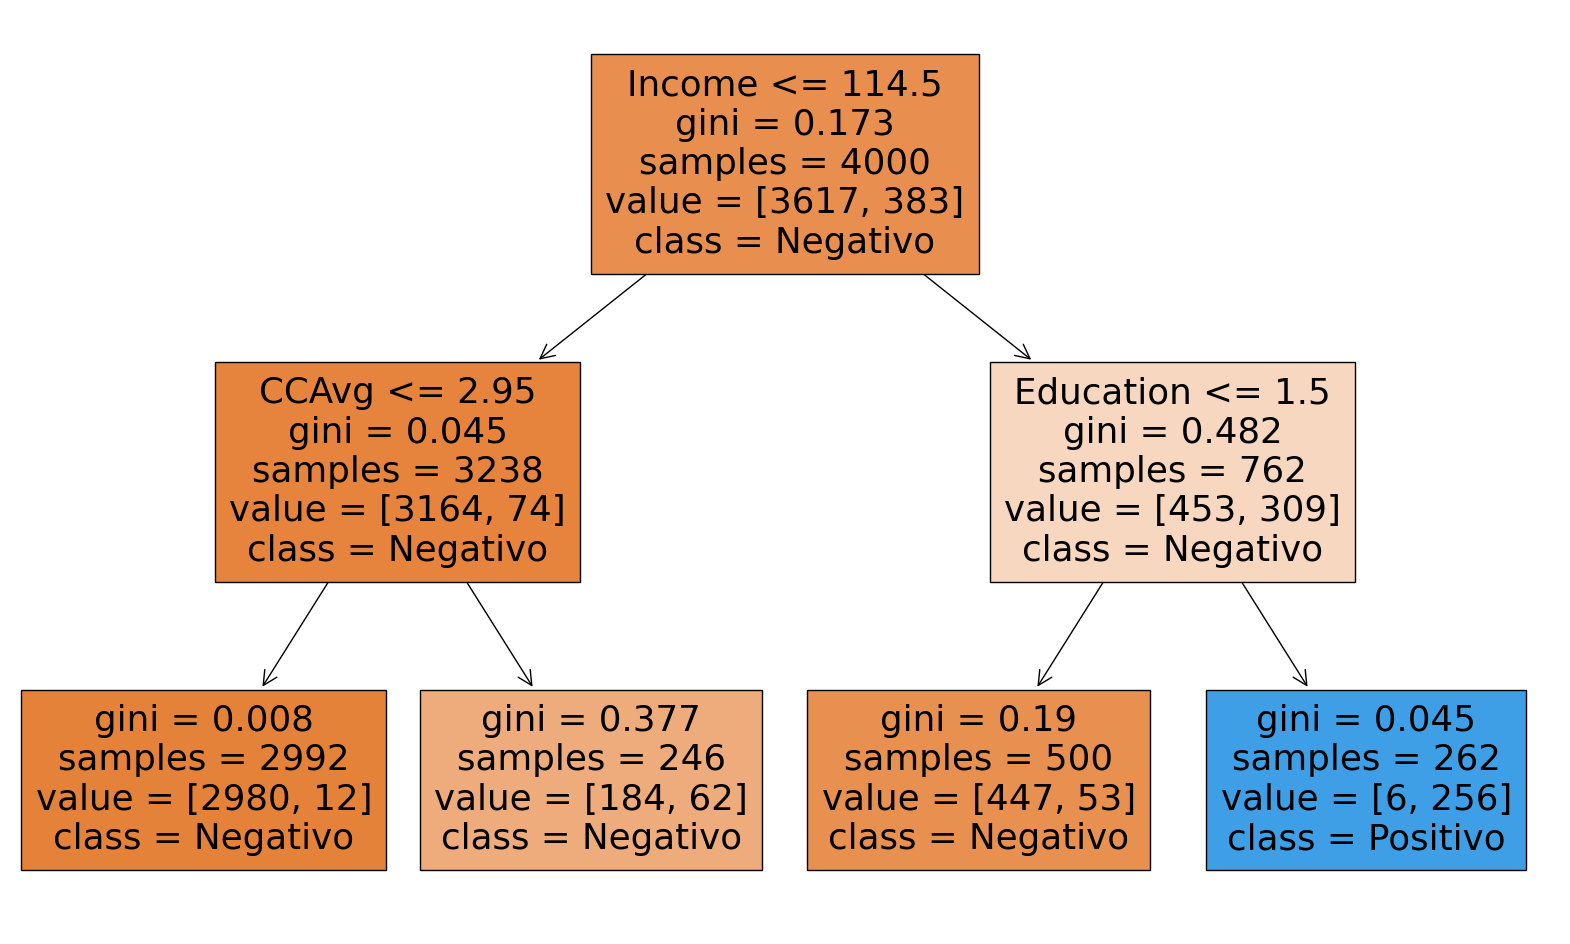

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the decision tree structure
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(
    clf,
    feature_names=list(X.columns.values),
    class_names=np.array(['Negativo','Positivo']),
    filled=True
)

In [ ]:
# la prepoda fue muy temprana y no alcanzó a predecir gran parte de los datos de prueba.

f) Busque los mejores valores de los criterios de corte y máxima profundidad para este caso, con 10 validaciones cruzadas, y entregue sus valores (Hint: evalue los hiperparámetros criterion y max_depth)

In [ ]:
# Create the decision tree classifier
# Make predictions on the test set
clf, y_pred = decision_tree(X_train, y_train, max_depth=15)
# y_test no cambia

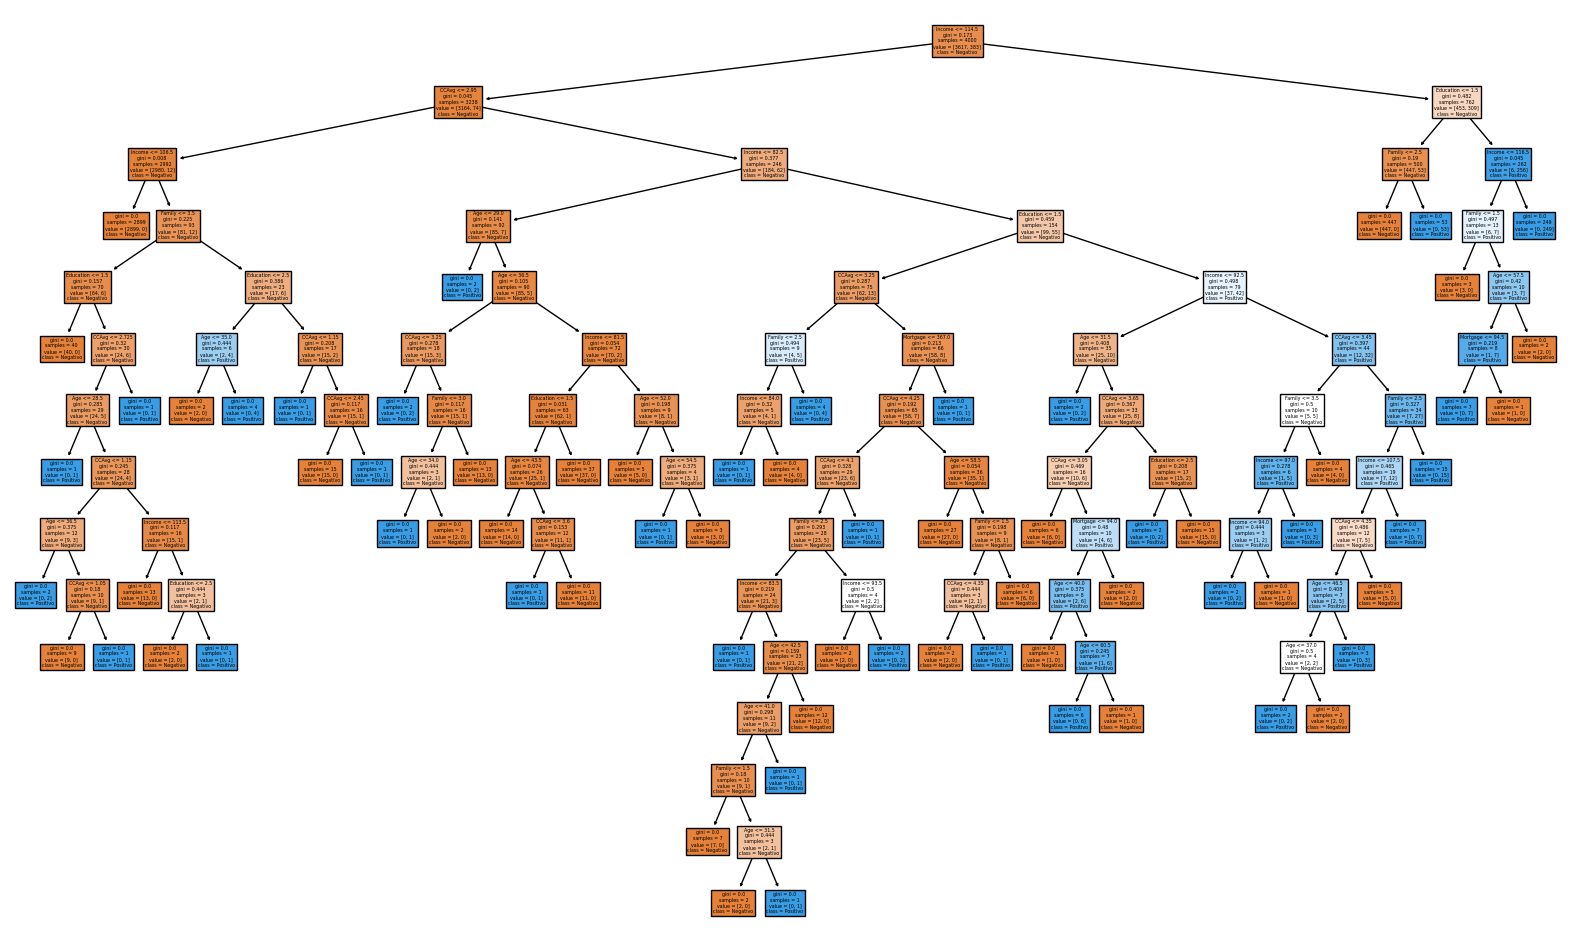

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display the decision tree structure
plt.figure(figsize=(20, 12))
_ = tree.plot_tree(
    clf,
    feature_names=list(X.columns.values),
    class_names=np.array(['Negativo','Positivo']),
    filled=True
)

In [ ]:
# Mean Squared Error (MSE)
mse3 = mean_squared_error(y_true, y_pred)
print('DecisionTreeClassifier (MSE) prueba sin prepoda          :'+str(mse))
print('DecisionTreeClassifier (MSE) prueba profundidad árbol=2  :'+str(mse2))
print('DecisionTreeClassifier (MSE) prueba profundidad árbol=15 :'+str(mse3))

DecisionTreeClassifier (MSE) prueba sin prepoda          :0.014
DecisionTreeClassifier (MSE) prueba profundidad árbol=2  :0.031
DecisionTreeClassifier (MSE) prueba profundidad árbol=15 :0.013


In [ ]:
# con una profundidad de 15 el modelo completa la predicción para todo el set de datos de prueba y su MSE se aproxima en mejor
# medida a la obtenida en la prueba del modelo sin definir una profundida del çarbol o prepoda

In [ ]:
# the scores
mse_scores = cross_val_score(clf, X, y, cv=10)
# Print the mean and standard deviation of MSE scores
print("Mean MSE:", mse_scores.mean())
print("Standard Deviation of MSE:", mse_scores.std())

Mean MSE: 0.9848000000000001
Standard Deviation of MSE: 0.004915282290977808


In [180]:
# Como se mencionó anteriormente dentro de las variables explicativas, respecto al orden de importancia para predecir el comportamiento
# del cliente para el caso en estudio, claramente la variable "Education" y en segundo lugar la variable "Income", juegan un factor 
# importante a la hora de tomar la decisión por parte del cliente y que deberán ser consideradas para guiar sus futuras campañas en
# en el ejericio de captar de mejor manera o eficazmente sus potenciales clientes.